<a href="https://colab.research.google.com/github/adeth22/TalentoTech_Andres/blob/main/An%C3%A1lisis_Series_de_Tiempo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import requests
import io

In [ ]:
# Leer archivo xlsx con pandas df. Codigo para leer file de una carpeta compartida.
url = 'https://drive.google.com/uc?export=download&id=1ah6MblcYXRAbSp5PxCzeNbgWld5mFGGp'
response = requests.get(url)
response.raise_for_status()  # Lanza una excepción si hay un error en la descarga

# Download the file content in binary mode
response = requests.get(url, stream=True)
response.raise_for_status()

# Use BytesIO instead of StringIO as the file is binary
file_content = io.BytesIO(response.content)

# Read the Excel file from the BytesIO object
df = pd.read_excel(file_content, engine="openpyxl") # engine='openpyxl' can better handle various Excel formats.

df # Visualizar el conjunto de datos

,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM)
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


In [ ]:
print(df.head())
print('\n\n')
print(df.dtypes)

  Fecha (dd/mm/aaaa)  Tasa de cambio representativa del mercado (TRM)
0         1991-11-27                                           693.32
1         1991-11-28                                           693.99
2         1991-11-29                                           694.70
3         1991-11-30                                           694.70
4         1991-12-01                                           643.42



Fecha (dd/mm/aaaa)                                 datetime64[ns]
Tasa de cambio representativa del mercado (TRM)           float64
dtype: object


In [ ]:
df = df.rename(columns={"Fecha (dd/mm/aaaa)": "Fecha"})
df = df.rename(columns={"Tasa de cambio representativa del mercado (TRM)": "TRM"})


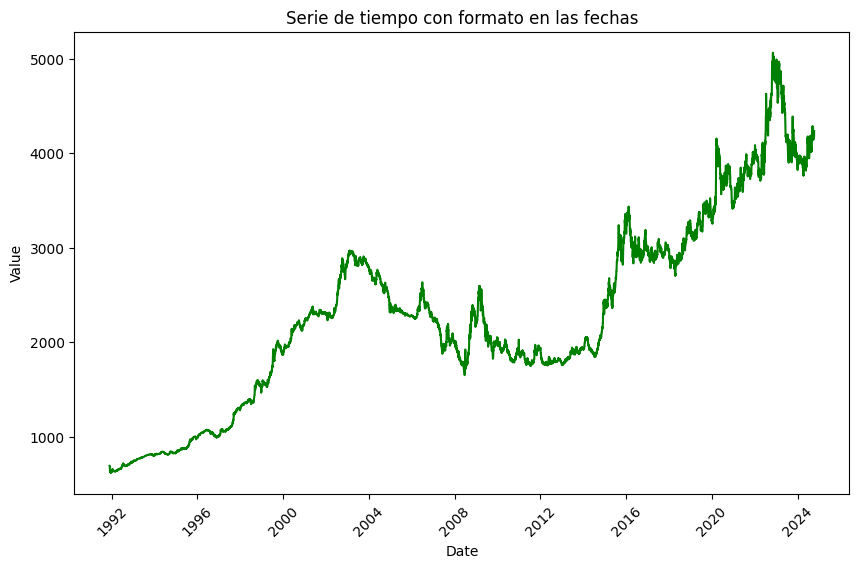

In [ ]:
#Crear Gráfico de líneas
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Fecha'], df['TRM'], color = 'green')

plt.xticks(rotation=45)

plt.title('Serie de tiempo con formato en las fechas')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

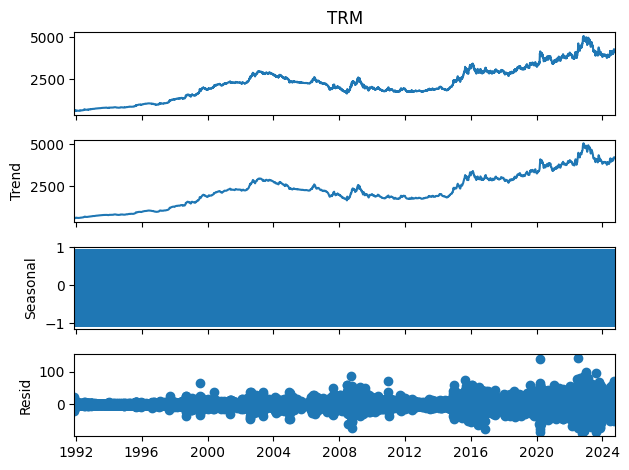

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Establecer la columna 'Fecha' como índice del DataFrame
df.set_index('Fecha', inplace=True)

# Frecuencia de la serie de tiempo (por ejemplo, 'D' para días, 'M' para meses)
df = df.asfreq('D')  # Ajusta según la frecuencia de tu serie de tiempo

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(df['TRM'], model='additive')

# Graficar los componentes: observados, tendencia, estacionalidad y residuales
decomposition.plot()
plt.tight_layout()
plt.show()

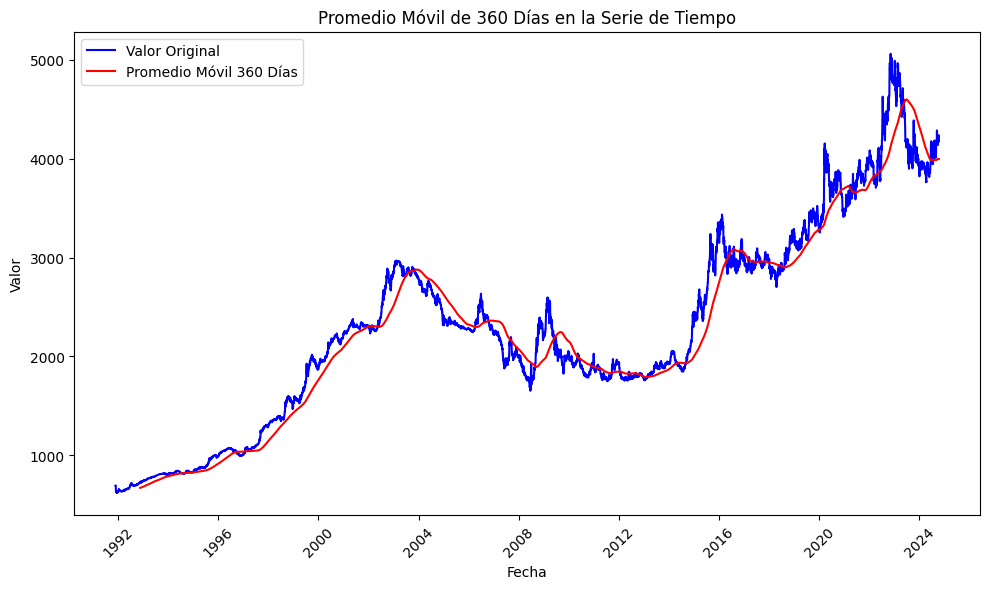

In [ ]:
# Definir el periodo de la ventana móvil (n días)
n = 360  # Puedes ajustar el valor de 'n' según lo que quieras analizar

# Calcular el promedio móvil (rolling mean) de la columna 'valor'
df['mmovil'] = df['TRM'].rolling(window=n).mean()
# Graficar la serie de tiempo original y el promedio móvil
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TRM'], label='Valor Original', color='blue')
plt.plot(df.index, df['mmovil'], label=f'Promedio Móvil {n} Días', color='red')

# Configurar etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title(f'Promedio Móvil de {n} Días en la Serie de Tiempo')
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas de las fechas si es necesario
plt.tight_layout()
plt.show()

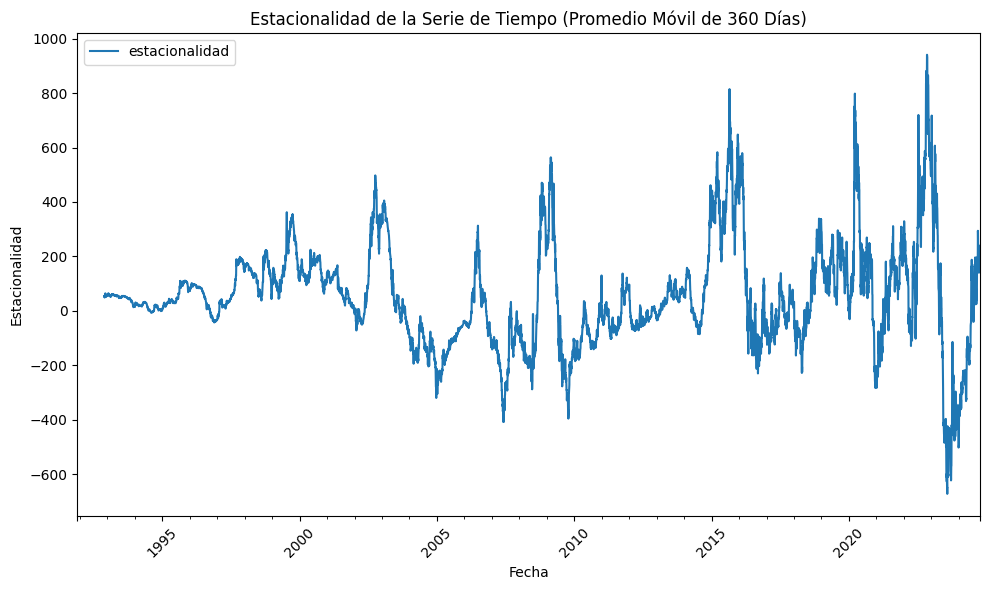

In [ ]:
# Calcular la estacionalidad restando el promedio móvil de los valores originales
df['estacionalidad'] = df['TRM'] - df['mmovil']

# Graficar la estacionalidad a lo largo del tiempo
df[['estacionalidad']].plot(y='estacionalidad', figsize=(10, 6))

# Personalizar el gráfico
plt.title(f'Estacionalidad de la Serie de Tiempo (Promedio Móvil de {n} Días)')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.xticks(rotation=45)  # Rotar las etiquetas de fecha
plt.tight_layout()

# Mostrar el gráfico
plt.show()